In [1]:
#####################################################################
# This notebook is authored by: Ayan Paul                           #
# Date: May 2022                                                    #
# If you use this code or the results from this work please cite:   # 
# Machine learning the trilinear and light-quark Yukawa couplings   #
# from Higgs pair kinematic shapes                                  #
# Lina Alasfar, Ramona Gröber, Christophe Grojean, Ayan Paul        #
# and Zuoni Qian                                                    #
# arXiv:2207.04157 (https://arxiv.org/abs/2207.04157)               #  
#####################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math
from matplotlib.lines import Line2D

plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams['font.family'] = 'monospace'

In [16]:
def makeGraph(G, df, threshold, pos, seed=0, iterations=0, kfactor=0):
    """ function to make one network plot
        arguments:
            G: The networkx graph object
            df: The dataframe from which the correlations need to be computed
            threshold: the threshold for the lowest correlation cutoff
            seed: the seed for the random number generator (default 0)
            interations: the number of iterations for the clustering algorithm (default: 0)
            kfactor: a real number that controls the srping constant for the clustering algoritm (default: 0)
    """
    # clear the graph
    G.clear()
    
    # define the couplings
    var = {}
    nodelist = []
    names = [r'$n_{jet}$', r'$p_T^{b_1}$', r'$p_T^{\gamma_1}$', r'$p_T^{\gamma_2}$',
             r'$p_T^{\gamma\gamma}$', r'$\eta_{b_1}$', r'$\eta_{\gamma_1}$', r'$\eta_{\gamma_2}$', 
             r'$m_{bb}$', r'$m_{\gamma\gamma}$', r'$m_{b_1h}$', r'$m_{bbh}$', r'$E^{\rm miss}_T$', r'$H_T$']
    size = len(names)
    for i in range(size):
        var[i] = names[i]
        nodelist.append(i)

    corr = np.array(df.corr(method='pearson'))

    # add weight to the edges
    for i in range(0,size):
        for j in range(i+1,size):
            G.add_edge(i,j,weight=math.exp(np.abs(corr[i,j])), sign=np.sign(corr[i,j]))

    # node layouts
    if not pos or len(pos) < size:
        if pos:
            print("positions of nodes need to be recomputed since input position array is smaller")
        pos = nx.fruchterman_reingold_layout(G, iterations=iterations, k=kfactor, threshold=1e-16, weight='weight', seed=seed)

    steps = [0.2, 0.6, 0.8]
    # define correlation maps with edge positions
    epos0 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(steps[0]) <= d['weight'] < math.exp(threshold) and d['sign'] == 1.]
    epos1 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(threshold) <= d['weight'] < math.exp(steps[1]) and d['sign'] == 1.]
    epos2 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(steps[1]) <= d['weight'] < math.exp(steps[2]) and d['sign'] == 1.]
    epos3 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(steps[2]) <= d['weight'] < math.exp(1.) and d['sign'] == 1.]
    eneg0 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(steps[0]) <= d['weight'] < math.exp(threshold) and d['sign'] == -1.]
    eneg1 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(threshold) <= d['weight'] < math.exp(steps[1]) and d['sign'] == -1.]
    eneg2 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(steps[1]) <= d['weight'] < math.exp(steps[2]) and d['sign'] == -1.]
    eneg3 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(steps[2]) <= d['weight'] < math.exp(1.) and d['sign'] == -1.]

    # draw nodes
    nodesize = 3750
    nx.draw_networkx_nodes(G, pos, nodelist=nodelist, alpha=1, node_color='#e2d8e7', node_size=nodesize,
                               edgecolors='#9c7aad', linewidths=2)

    # edges weighting and drawing
    nx.draw_networkx_edges(G, pos, edgelist=epos0, width=1, alpha=0.1, edge_color='#5b5f6d')  # gray
    nx.draw_networkx_edges(G, pos, edgelist=epos1, width=2, alpha=0.6, edge_color='#ff741a', connectionstyle='Arc3, rad=10')  # orange
    nx.draw_networkx_edges(G, pos, edgelist=epos2, width=4, alpha=0.9, edge_color='#a53860', connectionstyle='Arc3, rad=10')  # red
    nx.draw_networkx_edges(G, pos, edgelist=epos3, width=5, alpha=1, edge_color='#005d9a', connectionstyle='Arc3, rad=10')  # blue
    nx.draw_networkx_edges(G, pos, edgelist=eneg0, width=1, alpha=0.1, edge_color='#5b5f6d', style='dashed')  # gray
    nx.draw_networkx_edges(G, pos, edgelist=eneg1, width=2, alpha=0.6, edge_color='#ff741a', style='dashed')  # orange
    nx.draw_networkx_edges(G, pos, edgelist=eneg2, width=4, alpha=0.9, edge_color='#a53860', style='dashed')  # red
    nx.draw_networkx_edges(G, pos, edgelist=eneg3, width=5, alpha=1, edge_color='#005d9a', style='dashed')  # blue

    # labels
    nx.draw_networkx_labels(G, pos, labels=var, font_size=30, font_weight='400')

    # return the position so that it can be used with the next graph if needed
    return pos


def makeEdgeLegend(plt, pos, size=70):
    """To make the edge legend for the edges
        arguments:
            plt: the matplotlib object
            pos: the position of the legend
            size: the zize of the legend
    """
    plt.rc('text', usetex=True)
    line0 = Line2D([0], [0], color='#5b5f6d', alpha=0.2, linewidth=8, linestyle='', marker='s', markersize=size) # gray
    line1 = Line2D([0], [0], color='#ff741a', linewidth=8, linestyle='', marker='s', markersize=size) # orange
    line2 = Line2D([0], [0], color='#a53860', linewidth=12, linestyle='', marker='s', markersize=size) # red
    line3 = Line2D([0], [0], color='#005d9a', linewidth=16, linestyle='', marker='s', markersize=size) # blue
    lineneg = Line2D([0], [0], color='black', linewidth=4, linestyle='dashed')
    linepos = Line2D([0], [0], color='black', linewidth=4, linestyle='-')
    labels = [r'$0.2 \leq |\rho| < 0.4$', r'$0.4 \leq |\rho| < 0.6$', r'$0.6 \leq |\rho| < 0.8$', r'$0.8 \leq |\rho| < 1.0$']
    labelsign = [r'$-\rho$', r'$+\rho$']
    plt.figlegend(handles=[line0, line1, line2, line3], labels=labels, handlelength=0.5, columnspacing=1.5, bbox_to_anchor=(0.5, -0.025), loc='lower center', prop={'size': size}, ncol=4, frameon=True)
    plt.figlegend(handles=[lineneg, linepos], labels=labelsign, bbox_to_anchor=(0.5, pos), loc='lower center', prop={'size': size}, ncol=2, frameon=True)

    
def makeNodeLegend(plt, posh, posv, size=70):
    """To make the node legend for the edges
        arguments:
            plt: the matplotlib object
            posh: the horizontal position of the legend
            posv: the vertical position of the legend
            size: the zize of the legend
    """
    plt.rc('text', usetex=True)
    circ0 = Line2D([0], [0], color='#99bde0', linestyle='', marker='o', markersize=45)  # blue
    circ1 = Line2D([0], [0], color='#ffc1cb', linestyle='', marker='o', markersize=45)  # pink
    circ2 = Line2D([0], [0], color='#cdcd00', linestyle='', marker='o', markersize=45)  # yellow
    circ3 = Line2D([0], [0], color='#cdcd00', alpha=0.3, linestyle='', marker='o', markersize=45)  # yellow
    labels = [r'$Higgs$', r'$aTGC$', r'$EW$', r'$EW=0$']
    plt.figlegend(handles=[circ0, circ1, circ2, circ3], labels=labels, labelspacing=0.25, handlelength=0.4, bbox_to_anchor=(posh, posv), borderpad=0.35,
                  loc='lower center', prop={'size': size}, ncol=1, frameon=True)
    

def fileparser(path):
    """ function for parsing the simulation data files
        argument:
            path: the relative or absolute path to the file
    """
    df = pd.read_csv(path)
    n = len(df)
    weight = int(round(np.mean(np.abs(df['weight'].to_numpy())) * 6 * 1e6 * n))
    return df.drop(['weight', 'ptb2', 'etaaa', 'dphibb', 'drba1', 'dphiba1', 'drbamin', 'nbjet', 'etab2'], axis=1), weight

In [3]:
# 14 TeV
path = '../simulations/HL-LHC/'

# k-factors
k_box = 1.98
k_int = 2.15
k_tri = 2.28
k_ku = 1.29
k_kd = 1.3

# The hhsm signal
df_hhsm_b, weight_hhsm_b = fileparser(path+"HH-box.tar.gz")
df_hhsm_i, weight_hhsm_i = fileparser(path+"HH-int.tar.gz")
df_hhsm_t, weight_hhsm_t = fileparser(path+"HH-tri.tar.gz")
weight_hhsm_b = weight_hhsm_b * k_box
weight_hhsm_i = weight_hhsm_i * k_int
weight_hhsm_t = weight_hhsm_t * k_tri

fact = 80
df_hhsm_HLLHC = pd.concat([df_hhsm_b.sample(n=int(weight_hhsm_b*fact)), df_hhsm_i.sample(n=int(weight_hhsm_i*fact)), df_hhsm_t.sample(n=int(weight_hhsm_t*fact))])
df_hhsm_HLLHC_10 = pd.concat([df_hhsm_b.sample(n=int(weight_hhsm_b*fact)), df_hhsm_i.sample(n=int(weight_hhsm_i*10*fact), replace=True), df_hhsm_t.sample(n=int(weight_hhsm_t*fact*100), replace=True)])

# kappa_u and kappa_d
df_ku_HLLHC, weight_ku = fileparser(path+"ku-1600.tar.gz")
df_kd_HLLHC, weight_kd = fileparser(path+"kd-800.tar.gz")
weight_ku = weight_ku * k_ku
weight_kd = weight_kd * k_kd

df_hhsm_ku_HLLHC = pd.concat([df_hhsm_HLLHC, df_ku_HLLHC.sample(n=int(weight_ku*fact))])
df_hhsm_kd_HLLHC = pd.concat([df_hhsm_HLLHC, df_kd_HLLHC.sample(n=int(weight_kd*fact))])
df_hhsm_ku_kd_HLLHC = pd.concat([df_hhsm_HLLHC, df_ku_HLLHC.sample(n=int(weight_ku*fact)), df_kd_HLLHC.sample(n=int(weight_kd*fact))])
df_hhsm_ku_kd_kl_HLLHC = pd.concat([df_hhsm_HLLHC_10, df_ku_HLLHC.sample(n=int(weight_ku*fact)), df_kd_HLLHC.sample(n=int(weight_kd*fact))])

________________________
### Progressively combining the channels in network plots

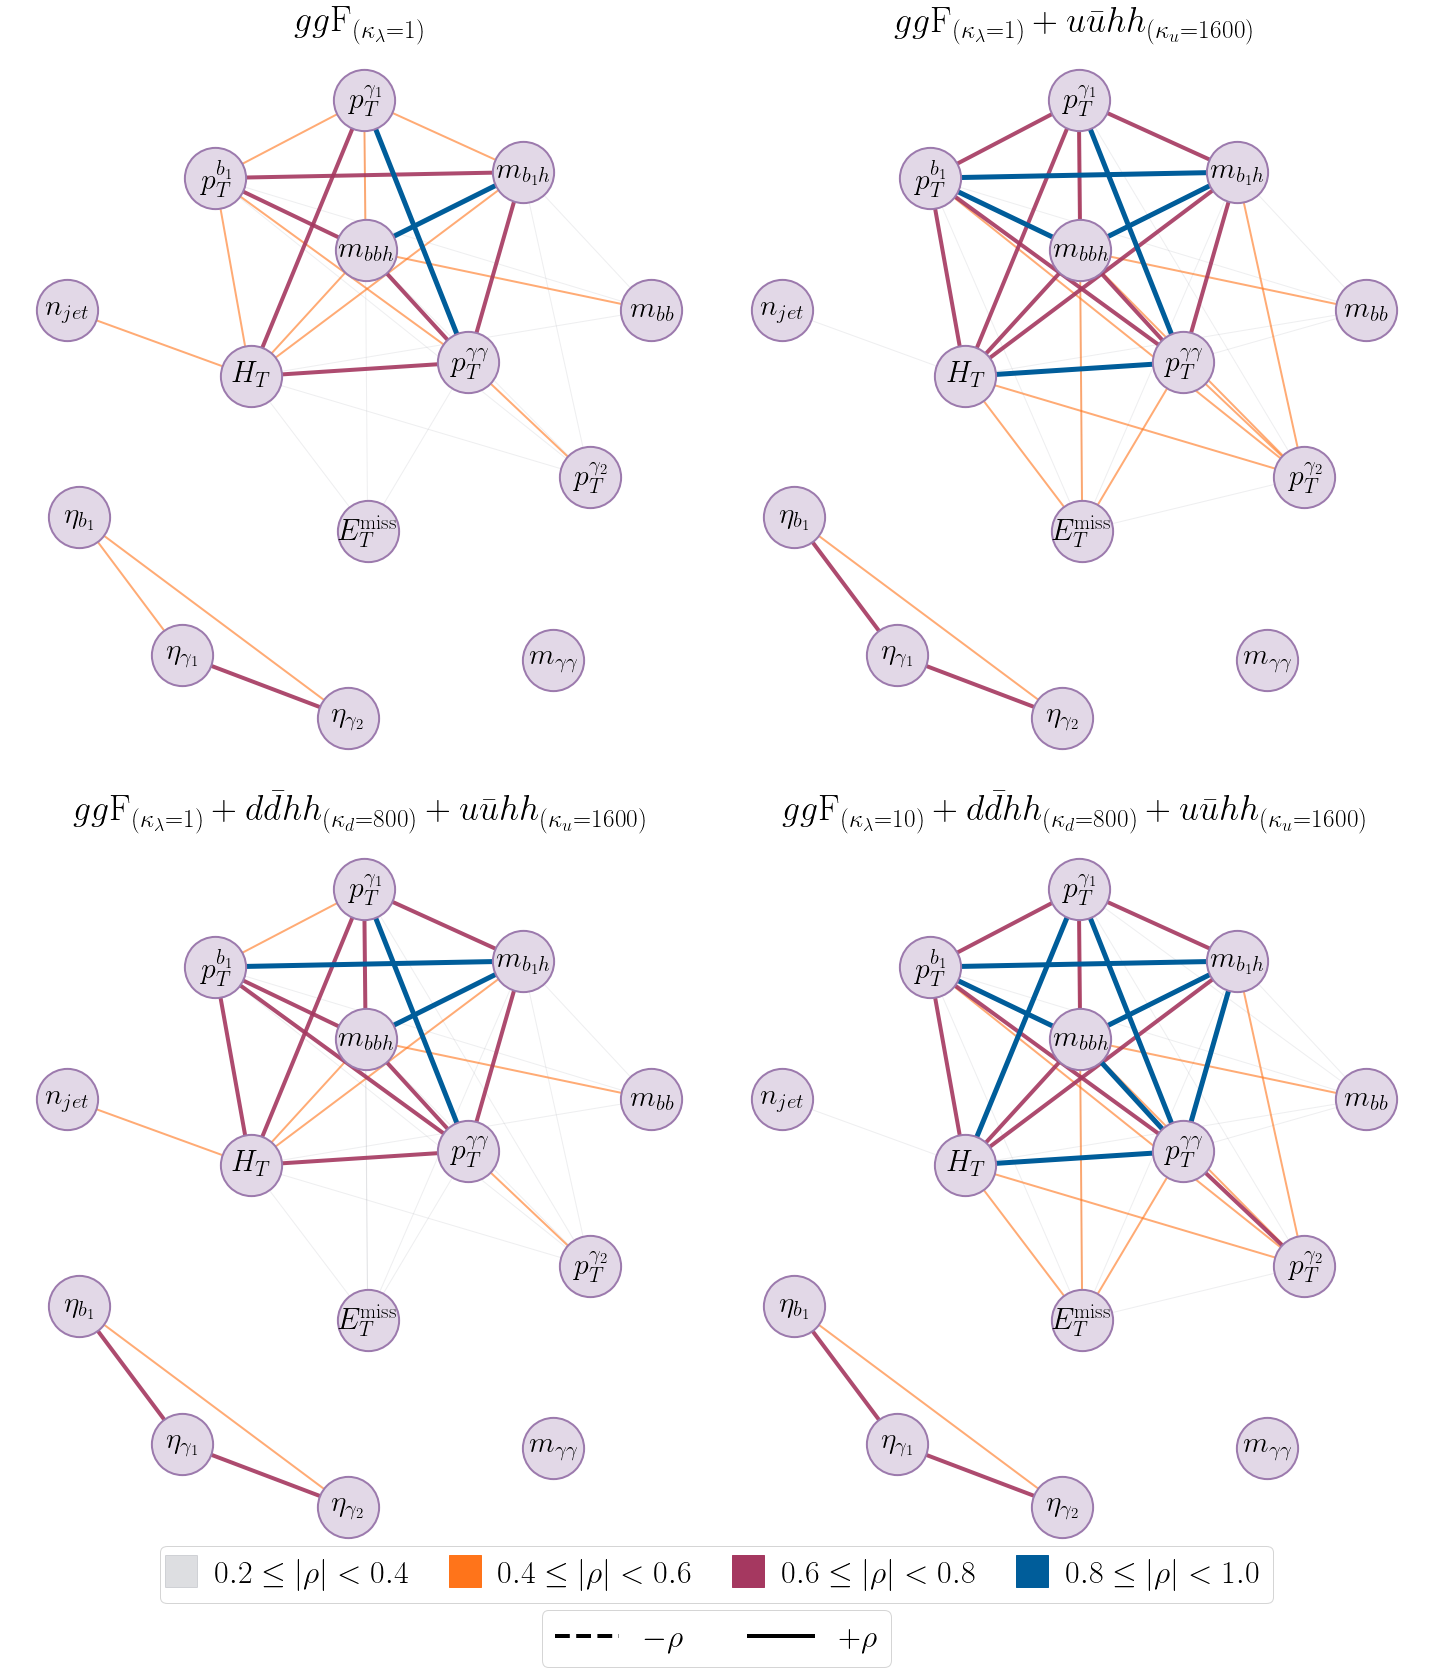

In [35]:
# initialize the graph
G = nx.Graph()
threshold = 0.4


pos = []
pos = makeGraph(G, df=df_kd_HLLHC, threshold=threshold, pos=pos, seed=5, iterations=1110, kfactor=0.55)
plt.close()

plt.figure(figsize=(20,22))
plt.rc('text', usetex=True)
name='../plots/networks-signal-progression.pdf'

plt.subplot(2,2,1)
plt.axis('off')
pos = makeGraph(G, df=df_hhsm_HLLHC, threshold=threshold, pos=pos, seed=5, iterations=1110, kfactor=0.55)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))
plt.title(r'$gg {\rm F}_{(\kappa_\lambda=1)}$', fontsize=36)

plt.subplot(2,2,2)
plt.axis('off')
pos = makeGraph(G, df=df_hhsm_ku_HLLHC, threshold=threshold, pos=pos)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))
plt.title(r'$gg {\rm F}_{(\kappa_\lambda=1)} + u\bar{u}hh_{(\kappa_u=1600)}$', fontsize=36)

plt.subplot(2,2,3)
plt.axis('off')
pos = makeGraph(G, df=df_hhsm_ku_kd_kl_HLLHC, threshold=threshold, pos=pos)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))
plt.title(r'$gg {\rm F}_{(\kappa_\lambda=1)} + d\bar{d}hh_{(\kappa_d=800)} + u\bar{u}hh_{(\kappa_u=1600)}$', fontsize=36)

plt.subplot(2,2,4)
plt.axis('off')
# pos = []
pos = makeGraph(G, df=df_hhsm_ku_kd_HLLHC, threshold=threshold, pos=pos)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))
plt.title(r'$gg {\rm F}_{(\kappa_\lambda=10)} + d\bar{d} hh_{(\kappa_d=800)} + u\bar{u}hh_{(\kappa_u=1600)}$', fontsize=36)

left  = 0.     # the left side of the subplots of the figure
right = 1      # the right side of the subplots of the figure
bottom = 0     # the bottom of the subplots of the figure
top = 1        # the top of the subplots of the figure
wspace = 0.1   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots
makeEdgeLegend(plt, -0.065, 32)

plt.tight_layout()
plt.savefig(name, dpi=300, bbox_inches='tight')
plt.show(block=False)
plt.close('all')

___________________________
### Different channels separately

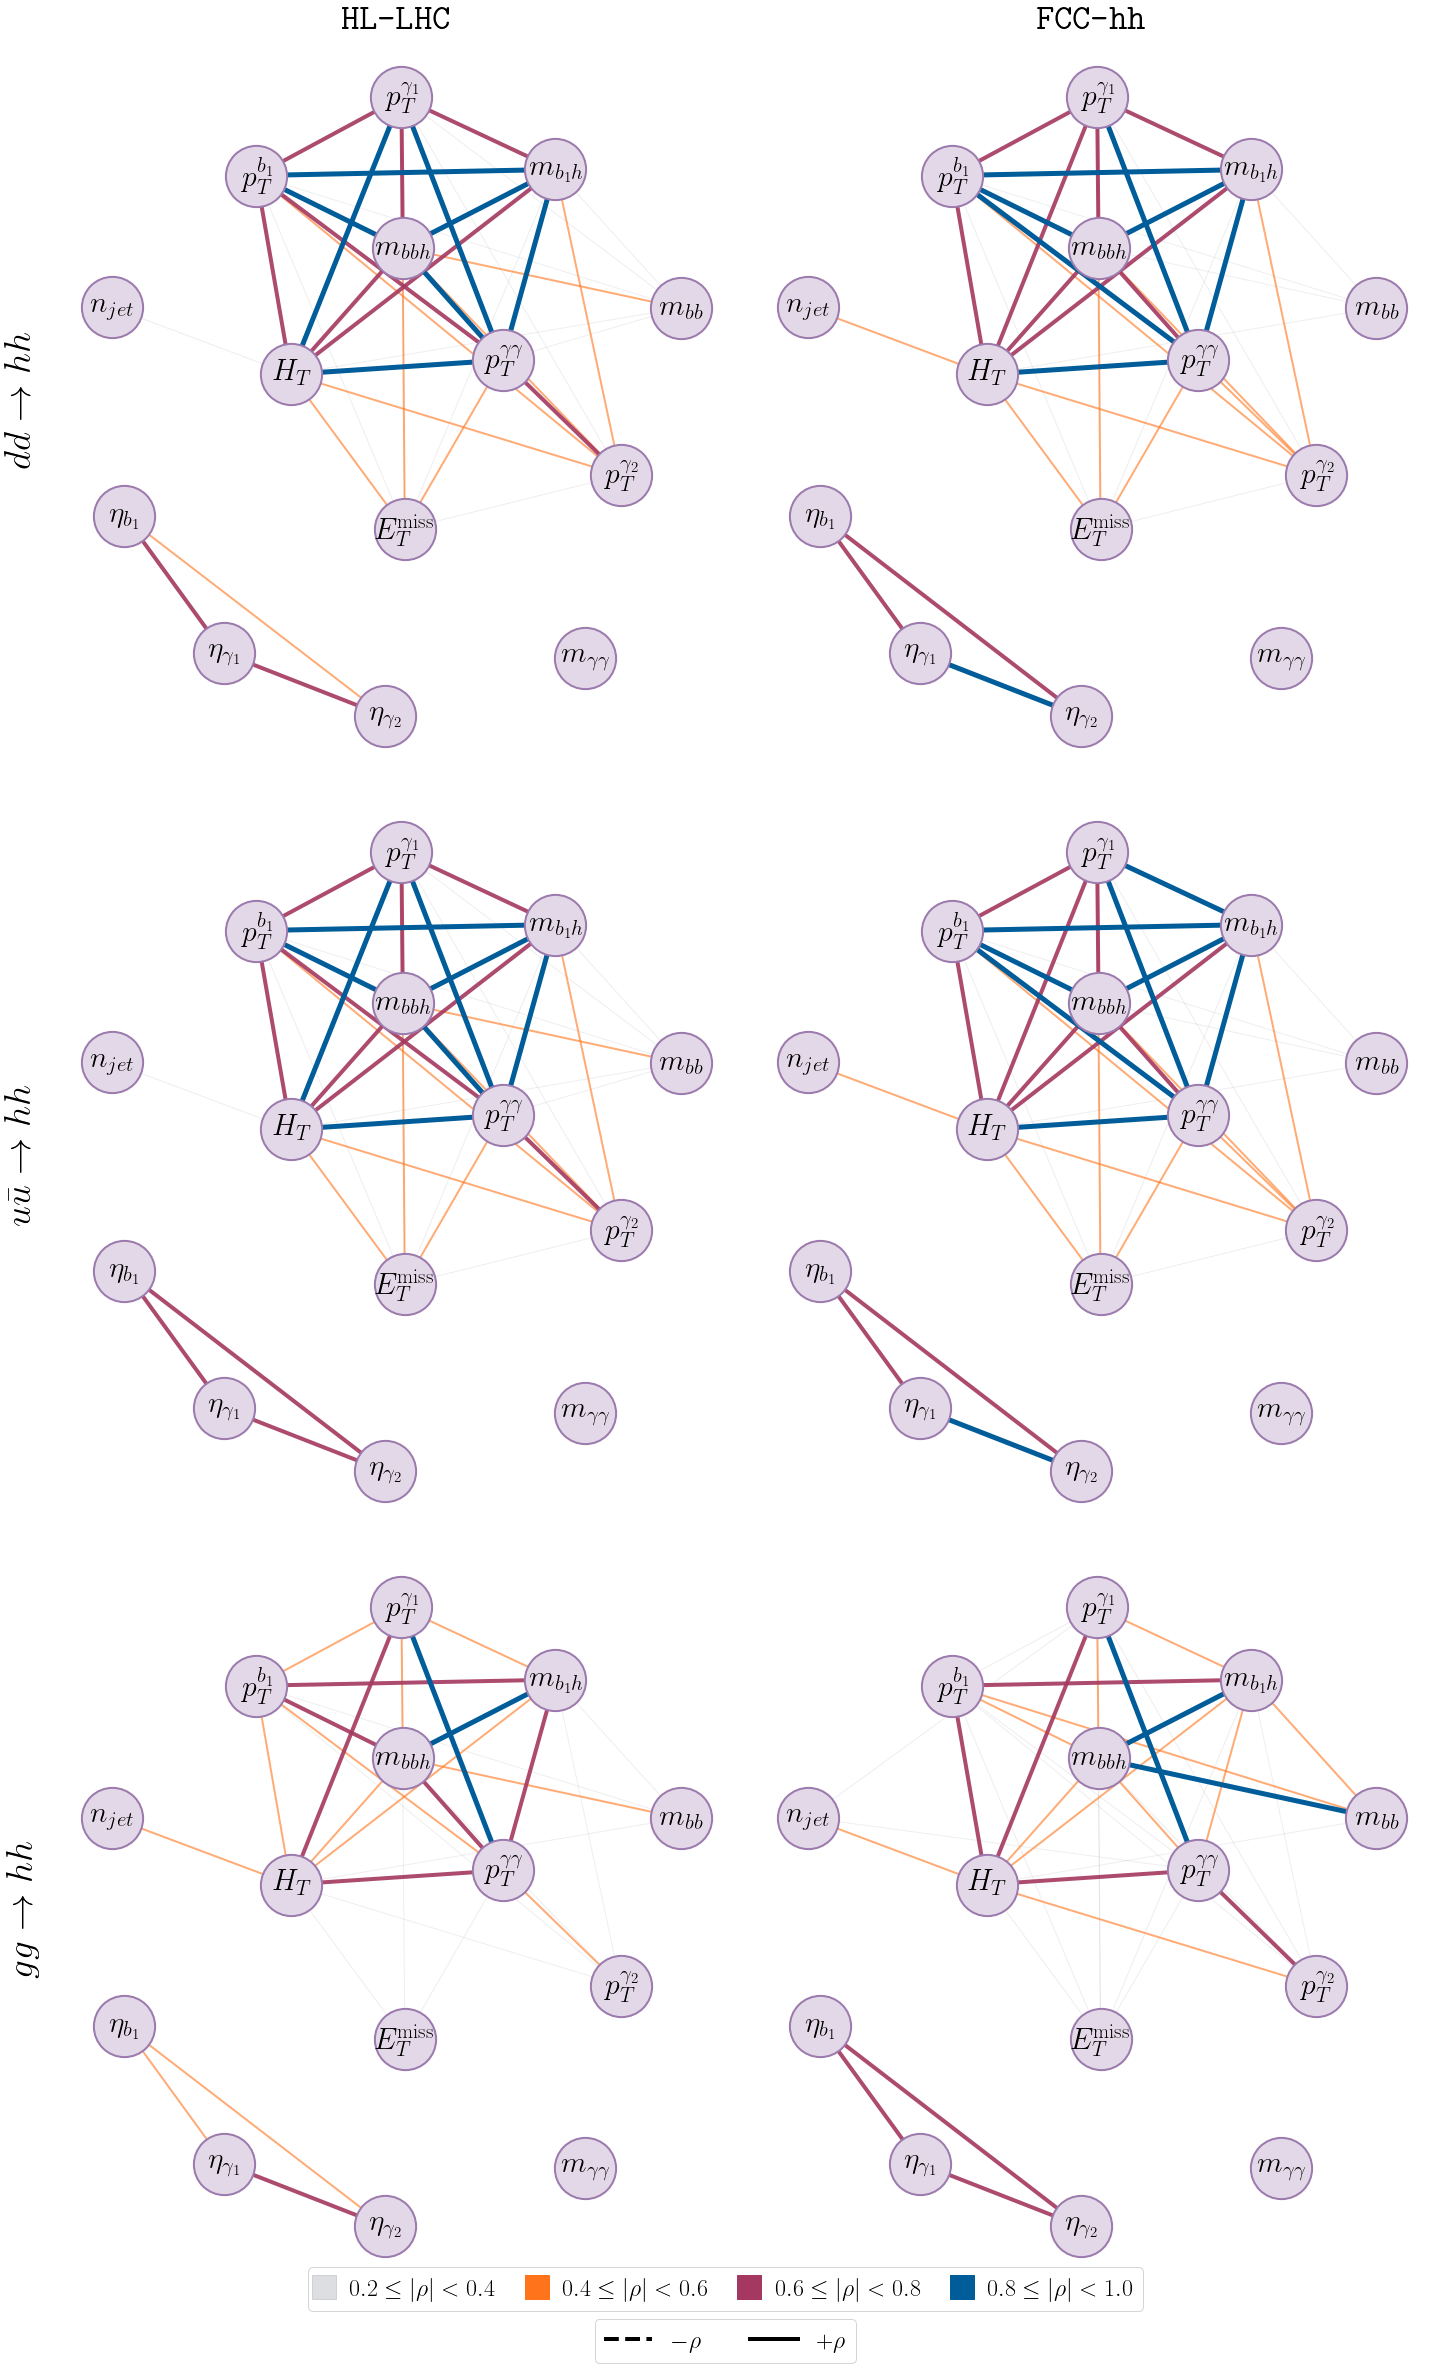

In [7]:
# initialize the graph
G = nx.Graph()
threshold = 0.4

plt.figure(figsize=(20,32))
plt.rc('text', usetex=True)
name='../plots/networks-signal.pdf'

plt.subplot(3,2,1)
plt.axis('off')
pos = []
pos = makeGraph(G, df=df_kd_HLLHC, threshold=threshold, pos=pos, seed=5, iterations=1110, kfactor=0.55)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))
plt.title("HL-LHC", fontsize=36)
plt.text(-1.25, 0, r'$d\bar{d}\to hh$', ha="center", va="center", size=37.5, rotation=90)

plt.subplot(3,2,3)
plt.axis('off')
pos = makeGraph(G, df=df_ku_HLLHC, threshold=threshold, pos=pos)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))
plt.text(-1.25, 0, r'$u\bar{u}\to hh$', ha="center", va="center", size=37.5, rotation=90)

plt.subplot(3,2,5)
plt.axis('off')
pos = makeGraph(G, df=df_hhsm_HLLHC, threshold=threshold, pos=pos)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))
plt.text(-1.25, 0, r'$gg\to hh$', ha="center", va="center", size=37.5, rotation=90)

plt.subplot(3,2,2)
plt.axis('off')
# pos = []
pos = makeGraph(G, df=df_kd_FCC, threshold=threshold, pos=pos)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))
plt.title("FCC-hh", fontsize=36)

plt.subplot(3,2,4)
plt.axis('off')
pos = makeGraph(G, df=df_ku_FCC, threshold=threshold, pos=pos)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))

plt.subplot(3,2,6)
plt.axis('off')
pos = makeGraph(G, df=df_hhsm_FCC, threshold=threshold, pos=pos)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1 - 0.1, x2 + 0.1, y1 - 0.1, y2 + 0.1))
plt.subplots_adjust(bottom=0.3, wspace=0.33)


left  = 0.     # the left side of the subplots of the figure
right = 1      # the right side of the subplots of the figure
bottom = 0     # the bottom of the subplots of the figure
top = 1        # the top of the subplots of the figure
wspace = 0.1   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots
makeEdgeLegend(plt, -0.0325, 24)

plt.tight_layout()
plt.savefig(name, dpi=300, bbox_inches='tight')
plt.show(block=False)
plt.close('all')